<a href="https://colab.research.google.com/github/resmyvijay/Furniture-Replacement/blob/main/Mask_R_CNN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries
     |████████████████████████████████| 92.6 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 367 kB 76.1 MB/s 
     |████████████████████████████████| 3.2 MB 68.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorfl

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER
/content/drive/MyDrive/Project P2/Mask_RCNN
Starting Mask R-CNN
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # This works on only on tensorflow version 1.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

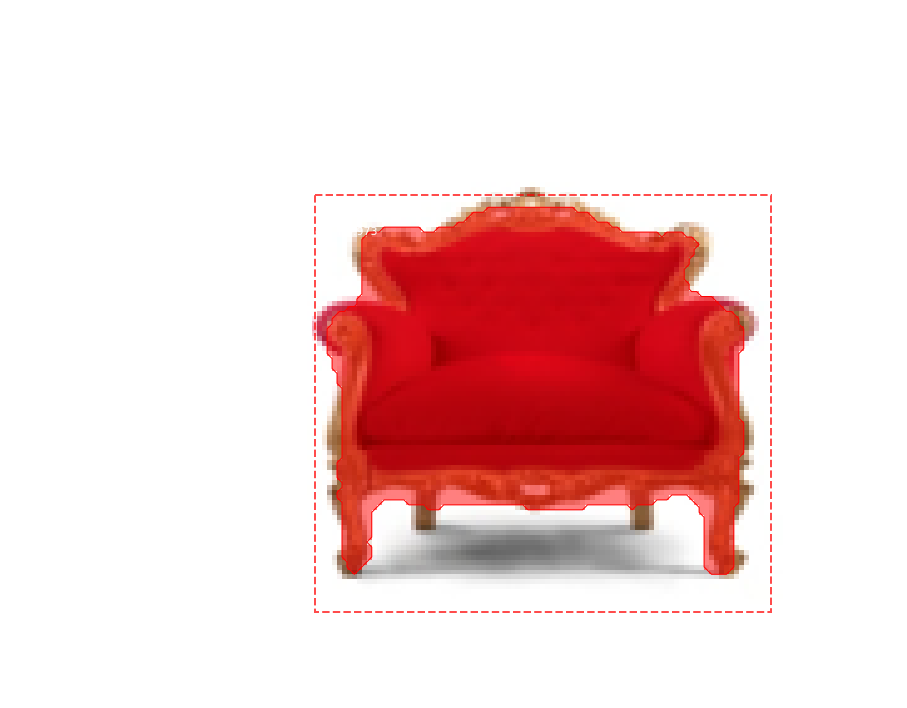

Total Objects found 1
chair


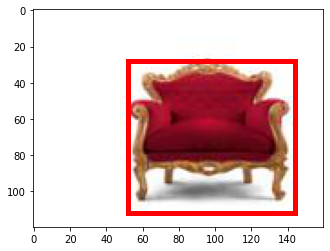

I AM REALLY HEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
I AM HEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
Processing 1 images
image                    shape: (120, 160, 3)         min:    3.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


<Figure size 432x288 with 0 Axes>

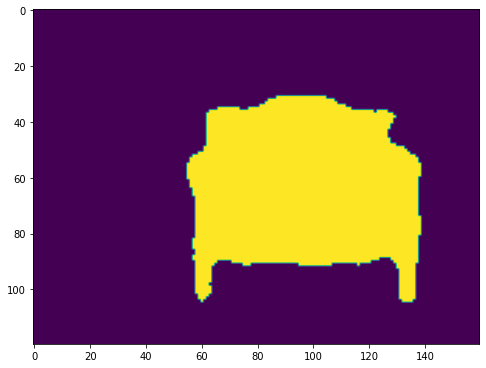

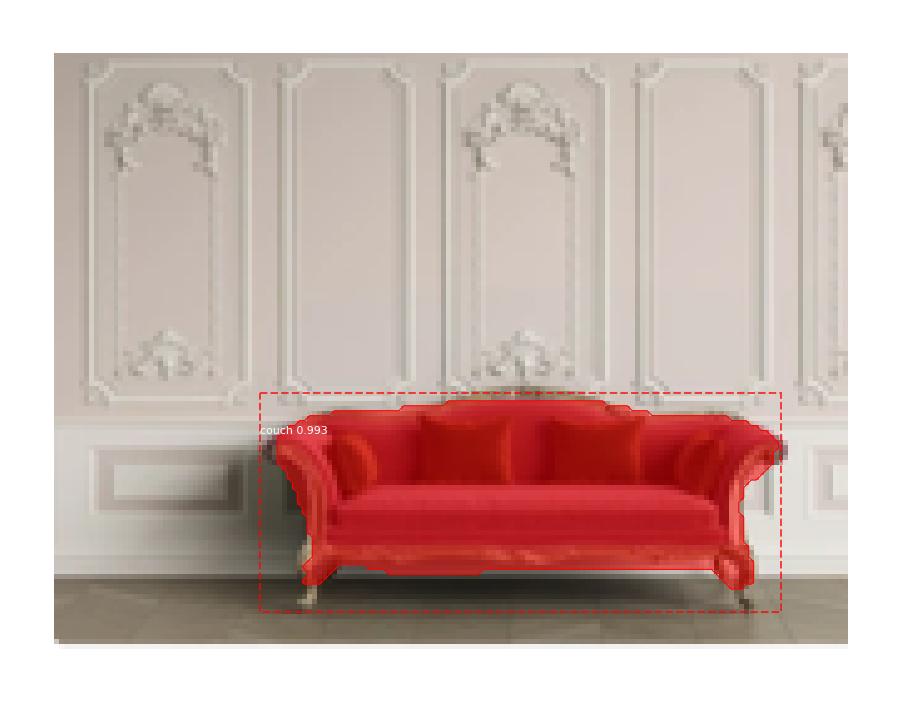

Total Objects found 1
couch


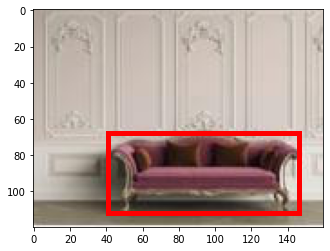

In [ ]:

# Loading the libraries
print("Loading Libraries")
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0
!pip install Pillow

# Loading library for deploying on anvil works
!pip install anvil-uplink

#Connecting to server on anvil
import anvil.server
anvil.server.connect("UZHKPZA7PFTKJ5AATECVZH2O-TIWTHG6M4FGTKGST")
import anvil.media
import anvil.tables.query as q
from anvil.tables import app_tables

#Making a function callable by anvil
@anvil.server.callable
def maskrcnn(input_indoor_scene_image,input_furniture_image):
  !rm "/content/drive/MyDrive/Project P2/Input Furniture/input_furniture.jpg"
  !rm "/content/drive/MyDrive/Project P2/Input Indoor Scene/input_indoor_scene.jpg"
  !rm "/content/drive/MyDrive/Project P2/Input Indoor Scene After Image Inpainting/input_indoor_scene.jpg"

  # Importing required modules
  import os # To perform operating-system related functions such as finding path or changing current directory
  import sys # To perform operating system related functions
  import math # To perform mathematical functions
  import numpy as np # To work on arrays
  import matplotlib.pyplot as plt # To plot images
  import warnings # To show warnings
  import cv2

  from PIL import Image # To perform image processing functions
  from numpy import asarray
  
  # Getting image files for indoor scene and new furniture from the webapp deployed on anvil works
  with anvil.media.TempFile(input_furniture_image) as filename:
        input_furniture = Image.open(filename)
        input_furniture = input_furniture.resize((160, 120))
        input_furniture.save('/content/drive/MyDrive/Project P2/Input Furniture/input_furniture.jpg') # Saving on Google drive to be used by other functions
        input_furniture = np.array(input_furniture)
        row =app_tables.status.get(Task="New Furniture Image Processing")
        row["Status"]="Done"
  with anvil.media.TempFile(input_indoor_scene_image) as filename:
        input_indoor_scene = Image.open(filename)
        input_indoor_scene=input_indoor_scene.resize((160,120))
        input_indoor_scene.save('/content/drive/MyDrive/Project P2/Input Indoor Scene/input_indoor_scene.jpg') # Saving on Google drive to be used by other functions
        input_indoor_scene = np.array(input_indoor_scene)  
        row=app_tables.status.get(Task="Indoor Scene Furniture Image Processing")
        row["Status"]="Done"

  #Function to draw boxes on an image with detected objects
  def draw_image_with_boxes(filename, boxes_list): #boxes_list is the output after object detection using Mask RCNN which has the location coordinates of the objects
      from matplotlib.patches import Rectangle
      # load the image
      data = plt.imread(filename)
      # plot the image
      plt.imshow(data)
      # get the context for drawing boxes
      ax = plt.gca()
      # plot each box
      for box in boxes_list:
            # get coordinates
            y1, x1, y2, x2 = box # This obtains the coordinates of each box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red', lw=5)
            # draw the box
            ax.add_patch(rect)
      # show the plot
      plt.show()
      return plt.gcf()

  %cd /content/drive/MyDrive/Project P2/Mask_RCNN

  print("Starting Mask R-CNN")
  %tensorflow_version 1.x # This works on only on tensorflow version 1.0

  # Root directory of the project
  ROOT_DIR = os.path.abspath("../Mask_RCNN") # The root directory is obtained as the root path + Mask_RCNN

  # Directory to save logs and trained model
  MODEL_DIR = os.path.join(ROOT_DIR, "logs") # The model directory is where the model is stored, and it is in logs directory within Mask R CNN

  # Local path to trained weights file
  COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5") #The coco model is stored as mask_rcnn_coco.h5

  # Download COCO trained weights from Releases if needed
  if not os.path.exists(COCO_MODEL_PATH):
      utils.download_trained_weights(COCO_MODEL_PATH)

  warnings.filterwarnings("ignore")

  # Import Mask RCNN
  sys.path.append(ROOT_DIR)  # To find local version of the library
  from mrcnn import utils
  import mrcnn.model as modellib #The mrcnn model is imported as modellib
  from mrcnn import visualize #The visualize function is used to visualize instances

  # Import COCO config
  sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  #To find local version of coco dataset
  import coco # Import coco python file which can download the Coco dataset

  %matplotlib inline

  class InferenceConfig(coco.CocoConfig):
      # Set batch size to 1 since we'll be running inference on
      # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
      GPU_COUNT = 1
      IMAGES_PER_GPU = 1

  config = InferenceConfig()
  config.display()

  # Create model object in inference mode.
  model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

  # Load weights for the pre-trained model which is a Mask R CNN trained on MS-COCO dataset
  model.load_weights('mask_rcnn_coco.h5', by_name=True)

  # COCO Class names
  class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane','bus', 'train', 'truck', 'boat', 'traffic light', 
                'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird','cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie','suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                'kite', 'baseball bat', 'baseball glove', 'skateboard','surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed','dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                'keyboard', 'cell phone', 'microwave', 'oven', 'toaster','sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                'teddy bear', 'hair drier', 'toothbrush']
  
  # Run detection for input furniture              
  results_f = model.detect([input_furniture], verbose=1)


  # Visualize results
  '''
  The result contains a dictionary.

  The dictionary has keys for the bounding boxes, masks, class ids and scores. Each key is a list for all the objects detected in the image.

  The keys are as follows:

  ‘rois‘: The bounding boxes or regions-of-interest (ROI) for detected objects
  ‘masks‘: The masks for the detected objects
  ‘class_ids‘: The class integers for the detected objects
  ‘scores‘: The probability or confidence for each predicted class
  '''
  rf = results_f[0] #This takes the results for the first object detected.
  visualize.display_instances(input_furniture, rf['rois'], rf['masks'], rf['class_ids'], class_names, rf['scores'])

  # Display the information of the number of objects and the classes
  classes= rf['class_ids']

  
  print("Total Objects found", len(classes))
  for i in range(len(classes)):
      print(class_names[classes[i]])

  draw_image_with_boxes('/content/drive/MyDrive/Project P2/Input Furniture/input_furniture.jpg', results_f[0]['rois'])

  mask_f = rf['masks']
  mask_f = mask_f.astype(int)
  mask_f.shape

  for i in range(mask_f.shape[2]):
      for j in range(input_furniture.shape[2]):
          input_furniture[:,:,j] = input_furniture[:,:,j] * mask_f[:,:,i]
      plt.figure(figsize=(8,8))
  
  print("I AM REALLY HEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")
  for i in range(mask_f.shape[2]): 
    print("I AM HEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")   
    mask_image_furniture=mask_f[:,:,i]
    plt.imshow(mask_f[:,:,i])

  # Get the mask image for furniture and save it in Google Drive
  im = Image.fromarray((mask_image_furniture * 255).astype(np.uint8))
  im.save('/content/drive/MyDrive/Project P2/Input Furniture Mask/input_furniture_mask.png')
 
  
  # Run detection for furniture in indoor scene image
  results_i = model.detect([input_indoor_scene], verbose=1)

  # Visualize results
  ri = results_i[0]
  labelled=visualize.display_instances(input_indoor_scene, ri['rois'], ri['masks'], ri['class_ids'], class_names, ri['scores'])


  classes= ri['class_ids']
  print("Total Objects found", len(classes))
  for i in range(len(classes)):
      print(class_names[classes[i]])

  draw_image_with_boxes('/content/drive/MyDrive/Project P2/Input Indoor Scene/input_indoor_scene.jpg', results_i[0]['rois'])

  mask_i = ri['masks']
  mask_i = mask_i.astype(int)
  mask_i.shape

  for i in range(mask_i.shape[2]):
      for j in range(input_indoor_scene.shape[2]):
          input_indoor_scene[:,:,j] = input_indoor_scene[:,:,j] * mask_i[:,:,i]
      plt.figure(figsize=(8,8))
      plt.imshow(input_indoor_scene)

  for i in range(mask_i.shape[2]):    
    mask_image_indoor_scene_furniture=mask_i[:,:,i]
    plt.imshow(mask_i[:,:,i])

  #Get the mask image for Indoor Scene Furniture and save it in Google Drive

  im = Image.fromarray((mask_image_indoor_scene_furniture * 255).astype(np.uint8))

  im.save('/content/drive/MyDrive/Project P2/Input Indoor Scene Furniture Mask/input_indoor_scene_furniture_mask.png')

  media_object =[]

  media_object.append(anvil.media.from_file('/content/drive/MyDrive/Project P2/Input Indoor Scene Furniture Mask/input_indoor_scene_furniture_mask.png'))
  media_object.append(anvil.media.from_file('/content/drive/MyDrive/Project P2/Input Furniture Mask/input_furniture_mask.png'))

  # We now have the masks for the indoor scene furniture image and the new furniture image.
  return media_object

@anvil.server.callable
def query_start_maskrcnn():
  return 1
anvil.server.wait_forever()